# Neural Network from Scratch

#### Importing Libraries

In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Importing the transformed dataset into the dataframe as csv

In [80]:
data = pd.read_csv('train.csv')
data.sort_values('label')

data.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,2,44,42,46,42,48,42,44,46,42,...,21,18,22,19,18,19,21,22,21,28
1,2,111,119,119,116,120,122,119,121,119,...,121,124,119,119,118,118,119,118,118,120
2,2,95,93,93,95,91,94,98,90,94,...,107,10,17,17,40,125,128,128,127,126
3,2,148,149,148,148,149,148,147,149,148,...,52,49,48,36,49,50,50,50,39,24
4,2,115,118,117,120,118,115,117,120,114,...,79,83,78,80,82,81,79,82,82,69


#### Transforming data set and performing train/test split

In [108]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)



data_train = data.T
X_train = data_train[1:n]
Y_train = data_train[0]
X_train = X_train / 255.
_,m_train = X_train.shape

X_train[0:5]

array([[0.24705882, 0.44705882, 0.26666667, ..., 0.38823529, 0.4627451 ,
        0.16470588],
       [0.21960784, 0.43921569, 0.28627451, ..., 0.40392157, 0.46666667,
        0.43921569],
       [0.27843137, 0.42352941, 0.29803922, ..., 0.37647059, 0.41960784,
        0.42352941],
       [0.35294118, 0.4       , 0.29019608, ..., 0.38431373, 0.41960784,
        0.39607843],
       [0.34509804, 0.35294118, 0.25098039, ..., 0.39607843, 0.43529412,
        0.42745098]])

#### Necessary functions for the task

In [82]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    smax = np.exp(Z) / sum(np.exp(Z))
    return smax

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def deriv_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() +1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2  
    

#### Main functions

In [83]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100000 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

#### Calling the main functions

In [84]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000000, 0.1)

Iteration:  0
[9 9 9 ... 9 9 9] [8 5 7 ... 8 5 0]
Accuracy:  0.098375


Iteration:  100000
[7 5 9 ... 6 9 4] [8 5 7 ... 8 5 0]
Accuracy:  0.4665
Iteration:  200000
[7 5 6 ... 6 9 5] [8 5 7 ... 8 5 0]
Accuracy:  0.451875
Iteration:  300000
[7 5 6 ... 8 9 5] [8 5 7 ... 8 5 0]
Accuracy:  0.490375
Iteration:  400000
[7 5 5 ... 8 9 4] [8 5 7 ... 8 5 0]
Accuracy:  0.519125
Iteration:  500000
[2 5 8 ... 8 9 4] [8 5 7 ... 8 5 0]
Accuracy:  0.546375
Iteration:  600000
[7 5 4 ... 8 9 4] [8 5 7 ... 8 5 0]
Accuracy:  0.54725
Iteration:  700000
[7 5 8 ... 8 9 4] [8 5 7 ... 8 5 0]
Accuracy:  0.5525
Iteration:  800000
[7 5 8 ... 8 9 4] [8 5 7 ... 8 5 0]
Accuracy:  0.55175
Iteration:  900000
[8 5 8 ... 8 9 4] [8 5 7 ... 8 5 0]
Accuracy:  0.54425


#### Making Predictions and calculating accuracy using the test dataset

In [127]:
data_test = pd.read_csv('test.csv')
data_test = np.array(data_test)
np.random.shuffle(data_test)
data_test = data_test.T
j, k = data_test.shape
print (j,k)
Y_test = data_test[0]
X_test = data_test[1:k]
X_test = X_test / 255.


def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    map = {
        0: 'bart simpson',
        1: 'charles montgomery_burns',
        2: 'homer simpson',
        3: 'krusty the clown',
        4: 'lisa simpson',
        5: 'marge simpson',
        6: 'milhouse van houten',
        7: 'moe szyslak',
        8: 'ned flanders',
        9: 'principal skinner'
    }
    
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", map[prediction[0]])
    print("Label: ", map[label])
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

data_test

785 2000


array([[  6,   7,   9, ...,   5,   7,   0],
       [187,  23, 195, ..., 107,  70, 144],
       [178,  24, 188, ..., 112,  65, 145],
       ...,
       [184,  45,  75, ..., 135,  95,  75],
       [180,  44,  69, ..., 136,  94,  75],
       [176,  23,  74, ..., 129,  83,  75]])

Prediction:  milhouse van houten
Label:  milhouse van houten


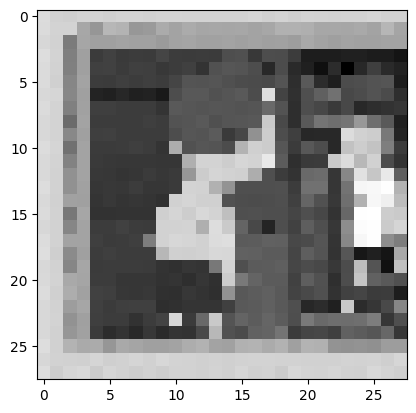

Prediction:  krusty the clown
Label:  moe szyslak


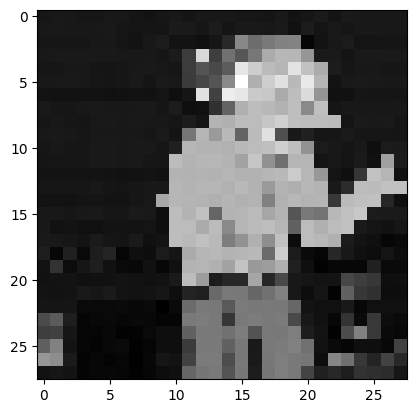

Prediction:  principal skinner
Label:  principal skinner


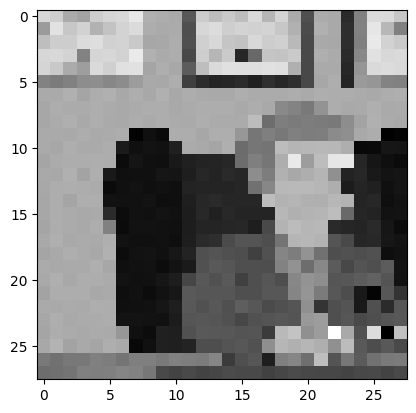

Prediction:  charles montgomery_burns
Label:  bart simpson


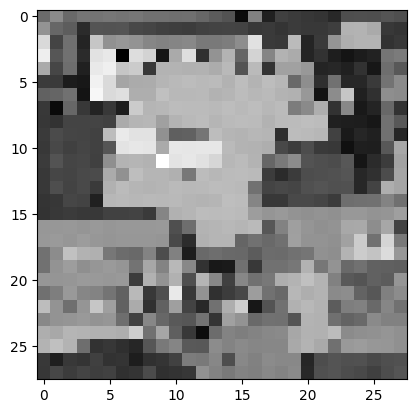

In [128]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [129]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
accuracy = get_accuracy(test_predictions, Y_test)



[6 3 9 ... 4 4 8] [6 7 9 ... 5 7 0]


#### Displaying the accuracy

In [130]:
print("Accuracy: ",accuracy)

Accuracy:  0.2095


# Bonus Task

In [134]:
X_bonus = pd.read_csv('bonus/bonus.csv')
X_bonus = np.array(X_bonus)
np.random.shuffle(X_bonus)
X_bonus = X_bonus.T

# X_bonus = data_bonus
X_bonus = X_bonus / 255.

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def bonus_prediction(index, W1, b1, W2, b2):
    map = {
        0: 'bart simpson',
        1: 'charles montgomery_burns',
        2: 'homer simpson',
        3: 'krusty the clown',
        4: 'lisa simpson',
        5: 'marge simpson',
        6: 'milhouse van houten',
        7: 'moe szyslak',
        8: 'ned flanders',
        9: 'principal skinner'
    }
    
    current_image = X_bonus[:, index, None]
    prediction = make_predictions(X_bonus[:, index, None], W1, b1, W2, b2)
    print("Prediction: ", map[prediction[0]])
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

#data_bonus
X_bonus

array([[0.01176471, 0.        , 0.        , ..., 0.        , 0.00784314,
        0.        ],
       [0.01568627, 0.03921569, 0.03137255, ..., 0.04705882, 0.00392157,
        0.01176471],
       [0.02745098, 0.        , 0.00784314, ..., 0.        , 0.        ,
        0.00784314],
       ...,
       [0.        , 0.00784314, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Prediction:  lisa simpson


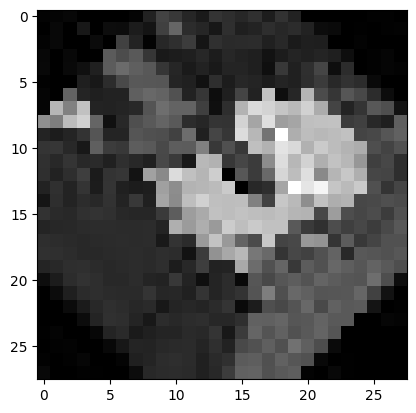

Prediction:  lisa simpson


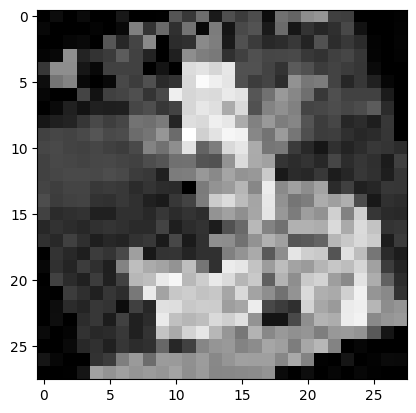

Prediction:  principal skinner


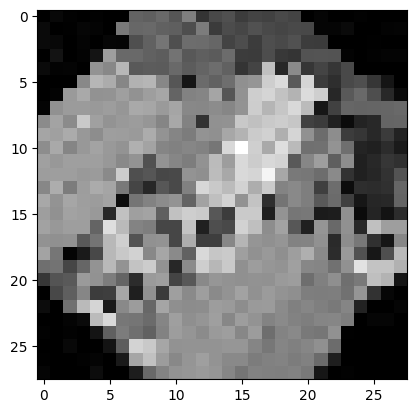

Prediction:  lisa simpson


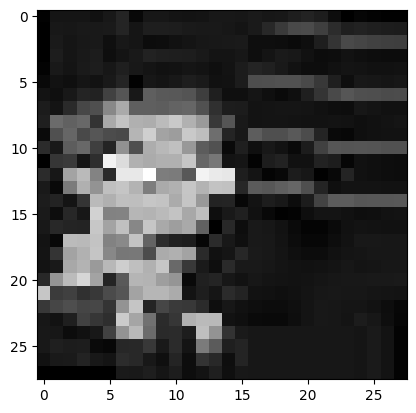

In [135]:
bonus_prediction(0, W1, b1, W2, b2)
bonus_prediction(1, W1, b1, W2, b2)
bonus_prediction(2, W1, b1, W2, b2)
bonus_prediction(3, W1, b1, W2, b2)